# Model: Klassifikation 

Ziel der Klassifikation ist es die Variabel *price category* mit einem F1-Score größer als 0.8 vorherzusagen. Die Variable *price category* gibt an ob der mittlere Immobilienwert eines Distrikts über 150 Tsd. USD liegt. 

In diesem Notebook wird die Klassifikation einmal mit der Bibliothek Statsmodels und der Bibliothek scikit-learn durchgeführt. Die Dokumention zu beiden Modellen ist unterteilt in: *data preperation*, *model* und *evaluation*. 

> Über diesen [Link](https://sh333hdm.github.io/jupyterbooktest/intro.html) ist die Ansicht der Projektarbeit als Jupyter Book möglich. 

## Statsmodel Model

In [1]:
from func import *
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
%load_ext autoreload
%autoreload 2

### Data preperation 

In [28]:
df = read_data()
df = transform_data(df)
train_dataset, evaluate_dataset, train_dataset_total, test_dataset = split_data(df)
train_dataset = fill_missingdata(train_dataset)
train_dataset = add_feautures(train_dataset)
train_dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,price_category,households_population,total_rooms_households,total_rooms_total_bedrooms,geohash
13940,-117.16,34.26,27.0,9285,1621.0,1135,410,2.5446,135200.0,INLAND,below,0.361233,22.646341,5.727946,9qh
14754,-117.05,32.56,17.0,985,233.0,811,223,2.8750,134500.0,NEAR OCEAN,below,0.274969,4.417040,4.227468,9mu
4404,-118.23,34.07,40.0,506,119.0,397,114,3.1944,143800.0,<1H OCEAN,below,0.287154,4.438596,4.252101,9q5
8646,-118.40,33.87,45.0,2093,497.0,842,472,6.3231,500001.0,<1H OCEAN,above,0.560570,4.434322,4.211268,9q5
18791,-122.56,40.75,20.0,1182,250.0,512,210,1.7935,74500.0,INLAND,below,0.410156,5.628571,4.728000,9r0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8243,-118.18,33.78,17.0,1419,436.0,1300,360,2.0769,100000.0,NEAR OCEAN,below,0.276923,3.941667,3.254587,9q5
12332,-116.47,33.94,18.0,2233,471.0,919,388,3.2578,85200.0,INLAND,below,0.422198,5.755155,4.740977,9qj
5775,-118.27,34.16,48.0,1301,253.0,637,260,4.3438,252700.0,<1H OCEAN,above,0.408163,5.003846,5.142292,9q5
13740,-117.19,34.03,36.0,2223,361.0,942,331,4.6806,152400.0,INLAND,above,0.351380,6.716012,6.157895,9qh


In diesem Schritt werden die Funktionen func.py verwendet. Diese sind im Notebook [Data](https://sh333hdm.github.io/jupyterbooktest/intro.html)  näher erläutert. 

In [29]:
train_dataset.drop(columns=['longitude', 'latitude', 'total_rooms', 'total_bedrooms', 'population','households', 'median_house_value', 'housing_median_age'], inplace= True)

Nicht im Modell berücksichtigt werden folgende Features 
* *longitude*, *latidue* (siehe Feauture Selection)
* *total_rooms*, *total__bedrooms*, *population* und *households*, da die Korrelation dieser Merkmale untereinander zu hoch ist (siehe Feauture Selection)
* *median_house_value*, da *price_category* aus diesem Merkmal abgeleitet wird
* *housing_median_age*, da nach einmaliger Durchführung der Klassifikation ein p-Wert von P|z|=0.309 ermittelt wurde 

### Model

In [30]:
model = smf.glm(formula = 'C(price_category) ~ median_income + C(ocean_proximity) + households_population + total_rooms_households + total_rooms_total_bedrooms+C(geohash)' , data=train_dataset, family=sm.families.Binomial()).fit()

Die Klassifikation wird durch das Modell der logistischen Regression umgesetzt. In Statsmodels wird dafür die Klasse *Generalized Linear Model* genutzt. 
Die Varaiblen werden dem Model mit Hilfe der ``formula.api`` übergeben. Bei der Übergabe werden die kategorialen Variablen *price_category*, *ocean_proximity* und *geohash* explizit durch die patsy-funktion `C()` als solche gekennzeichnet. Damit wird sichergestellt, dass diesem im Modell als kategorialen Variablen behandelt werden und ein Dummy-Coding durchgeführt wird. 
Mit dem Parameter sm.family.Binomial() wird eine binomiale Verteilung spezifiziert. 


In [38]:
print(model.summary())

                                    Generalized Linear Model Regression Results                                     
Dep. Variable:     ['C(price_category)[above]', 'C(price_category)[below]']   No. Observations:                14860
Model:                                                                  GLM   Df Residuals:                    14820
Model Family:                                                      Binomial   Df Model:                           39
Link Function:                                                        logit   Scale:                          1.0000
Method:                                                                IRLS   Log-Likelihood:                -4658.0
Date:                                                      Tue, 18 Jan 2022   Deviance:                       9315.9
Time:                                                              07:54:45   Pearson chi2:                 1.59e+08
No. Iterations:                                                 

In [32]:
data_set_prob = train_dataset
data_set_prob['Probability_above'] = model.predict()
data_set_prob

,median_income,ocean_proximity,price_category,households_population,total_rooms_households,total_rooms_total_bedrooms,geohash,Probability_above
13940,2.5446,INLAND,below,0.361233,22.646341,5.727946,9qh,0.218661
14754,2.8750,NEAR OCEAN,below,0.274969,4.417040,4.227468,9mu,0.358694
4404,3.1944,<1H OCEAN,below,0.287154,4.438596,4.252101,9q5,0.792244
8646,6.3231,<1H OCEAN,above,0.560570,4.434322,4.211268,9q5,0.999337
18791,1.7935,INLAND,below,0.410156,5.628571,4.728000,9r0,0.001245
...,...,...,...,...,...,...,...,...
8243,2.0769,NEAR OCEAN,below,0.276923,3.941667,3.254587,9q5,0.443452
12332,3.2578,INLAND,below,0.422198,5.755155,4.740977,9qj,0.162644
5775,4.3438,<1H OCEAN,above,0.408163,5.003846,5.142292,9q5,0.972518
13740,4.6806,INLAND,above,0.351380,6.716012,6.157895,9qh,0.695464


Ergebnis der logistischen Regression sind Wahrscheinlichkeiten p für das Eintreten der Ausprägung *above* der kategorialen Variabel *price_category*. 

In [33]:
data_set_prob['Threshold 0.4'] = np.where(data_set_prob['Probability_above'] > 0.4, 'above', 'below')
data_set_prob['Threshold 0.5'] = np.where(data_set_prob['Probability_above'] > 0.5, 'above', 'below')
data_set_prob['Threshold 0.6'] = np.where(data_set_prob['Probability_above'] > 0.6, 'above', 'below')
data_set_prob['Threshold 0.7'] = np.where(data_set_prob['Probability_above'] > 0.7, 'above', 'below')
data_set_prob

,median_income,ocean_proximity,price_category,households_population,total_rooms_households,total_rooms_total_bedrooms,geohash,Probability_above,Threshold 0.4,Threshold 0.5,Threshold 0.6,Threshold 0.7
13940,2.5446,INLAND,below,0.361233,22.646341,5.727946,9qh,0.218661,below,below,below,below
14754,2.8750,NEAR OCEAN,below,0.274969,4.417040,4.227468,9mu,0.358694,below,below,below,below
4404,3.1944,<1H OCEAN,below,0.287154,4.438596,4.252101,9q5,0.792244,above,above,above,above
8646,6.3231,<1H OCEAN,above,0.560570,4.434322,4.211268,9q5,0.999337,above,above,above,above
18791,1.7935,INLAND,below,0.410156,5.628571,4.728000,9r0,0.001245,below,below,below,below
...,...,...,...,...,...,...,...,...,...,...,...,...
8243,2.0769,NEAR OCEAN,below,0.276923,3.941667,3.254587,9q5,0.443452,above,below,below,below
12332,3.2578,INLAND,below,0.422198,5.755155,4.740977,9qj,0.162644,below,below,below,below
5775,4.3438,<1H OCEAN,above,0.408163,5.003846,5.142292,9q5,0.972518,above,above,above,above
13740,4.6806,INLAND,above,0.351380,6.716012,6.157895,9qh,0.695464,above,above,above,below


Zum bestimmten den Metriken*Accuracy*, *Precision*, *Recall* und *F1 Score*, sowie der Confusion-Matrix der einzelnen Grenzwerte wird die Funktion `print_metrics` angewendet. Diese wird in der Datei func.py definiert und ist der Funktion im [Notebook: World happiness report]( https://colab.research.google.com/github/kirenz/applied-statistics/blob/main/docs/cl-logistic-whr.ipynb) nachempfunden. 

In [39]:
print_metrics(data_set_prob, 'Threshold 0.4')
print_metrics(data_set_prob, 'Threshold 0.5')
print_metrics(data_set_prob, 'Threshold 0.6')
print_metrics(data_set_prob, 'Threshold 0.7')

--------------------------------------------------
Metrics for: Threshold 0.4

Predicted  above  below
Actual                 
above       8731    601
below       1527   4001
Accuracy:  0.8568
Precision: 0.8694
Recall:    0.7238
F1 Score:  0.7899 

--------------------------------------------------
Metrics for: Threshold 0.5

Predicted  above  below
Actual                 
above       8439    893
below       1131   4397
Accuracy:  0.8638
Precision: 0.8312
Recall:    0.7954
F1 Score:  0.8129 

--------------------------------------------------
Metrics for: Threshold 0.6

Predicted  above  below
Actual                 
above       8069   1263
below        788   4740
Accuracy:  0.8620
Precision: 0.7896
Recall:    0.8575
F1 Score:  0.8221 

--------------------------------------------------
Metrics for: Threshold 0.7

Predicted  above  below
Actual                 
above       7568   1764
below        534   4994
Accuracy:  0.8454
Precision: 0.7390
Recall:    0.9034
F1 Score:  0.8130 



Die Klassifikation mit den Grenzwert 0.6 hat den höchsten F1-Score mit 0.8221. Im Schritt Plan wurde festgelegt, dass der F1-Score, dass ausschlagegebende Kriterium ist. Daher wird dieser Grenzwert auch für die Testdaten angewendet.  

### Evaluate

In [35]:
test_dataset = fill_missingdata(test_dataset)
test_dataset = add_feautures(test_dataset)
test_dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,price_category,households_population,total_rooms_households,total_rooms_total_bedrooms,geohash
10,-122.26,37.85,52.0,2202,434.0,910,402,3.2031,281500.0,NEAR BAY,above,0.441758,5.477612,5.073733,9q9
13,-122.26,37.84,52.0,696,191.0,345,174,2.6736,191300.0,NEAR BAY,above,0.504348,4.000000,3.643979,9q9
19,-122.27,37.84,52.0,1503,298.0,690,275,2.6033,162900.0,NEAR BAY,above,0.398551,5.465455,5.043624,9q9
28,-122.28,37.84,50.0,2082,492.0,1131,473,1.6424,108900.0,NEAR BAY,below,0.418214,4.401691,4.231707,9q9
40,-122.26,37.83,52.0,1665,419.0,946,395,2.0978,155400.0,NEAR BAY,above,0.417548,4.215190,3.973747,9q9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20605,-121.58,39.12,26.0,2796,629.0,2017,632,1.8355,61200.0,INLAND,below,0.313337,4.424051,4.445151,9qc
20609,-121.56,39.11,18.0,2171,480.0,1527,447,2.3011,57500.0,INLAND,below,0.292731,4.856823,4.522917,9qc
20620,-121.48,39.05,40.0,198,41.0,151,48,4.5625,100000.0,INLAND,below,0.317881,4.125000,4.829268,9qc
20622,-121.44,39.00,20.0,755,147.0,457,157,2.4167,67000.0,INLAND,below,0.343545,4.808917,5.136054,9qc


Um das Modell auf Testdaten anzuwenden, müssen diese auch mit den Funktionen `fill_missingdata` und `add_features` vorbereitet werden. 

In [36]:
test_dataset['y_pred'] = model.predict(test_dataset[['median_income', 'ocean_proximity','housing_median_age', 'households_population', 'total_rooms_households', 'total_rooms_total_bedrooms', 'geohash']])

In [37]:
test_dataset['Threshold 0.6'] = np.where(test_dataset['y_pred'] > 0.6, 'above', 'below')
print_metrics(test_dataset, 'Threshold 0.6')

--------------------------------------------------
Metrics for: Threshold 0.6

Predicted  above  below
Actual                 
above       2292    336
below        236   1264
Accuracy:  0.8614
Precision: 0.7900
Recall:    0.8427
F1 Score:  0.8155 



Mit dem Testdaten wird ein F1-Score von 0.8155 erhalten. Dieser liegt über den Zielwert von 0.8. Das Model kann damit als Erfolg gewertet werden.  

## scikit-learn Model

In [91]:
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import sklearn.linear_model as skl_lm

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

from func import *
from sklearn import set_config
set_config(display="diagram")

### Data preperation

In [73]:
df = read_data()
df = transform_data(df)

In [74]:
#Split Test and Trainingsdata
X = df.drop(['price_category', 'median_house_value', ], axis=1)
y = df['price_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
X_train = add_feautures(X_train)

In [78]:
X_train.drop(columns=['longitude', 'latitude', 'total_rooms', 'total_bedrooms', 'population','households'], inplace= True)

In [79]:
preprocessor = build_preprocessor()

Zur Datenvorbereitung für die Klassifikation mit der Bibliothek scikit-learn wird ein *preprocessor* angewendet. Der Aufbau des *preprocessors* ist im Notebook Data genauer beschrieben. In diesem Fall wird dieser über die Funktion `build_preprocessor`erstellt. 

### Model

In [93]:
lr_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lm', skl_lm.LogisticRegression(max_iter=1000))
                        ])

In [94]:
y_pred = lr_pipe.fit(X_train, y_train).predict(X_train)

Mit scikit-learn wird ebenfalls eine logistische Regression durchgeführt. 

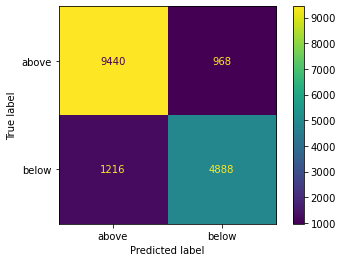

In [95]:
cm = confusion_matrix(y_train, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lr_pipe.classes_)
disp.plot()
plt.show()

In [96]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

       above       0.89      0.91      0.90     10408
       below       0.83      0.80      0.82      6104

    accuracy                           0.87     16512
   macro avg       0.86      0.85      0.86     16512
weighted avg       0.87      0.87      0.87     16512



Für die Ausgabe der Metriken der Klassifikation stellt scikit-learn Funktionen zur Verfügung. Wie bei dem Model mit Statsmodels wird zu Bewertung des Models die *Confusion Matrix* und die Metriken *Accuracy*, *Precision*, *Recall* und *F1 Score* betrachtet.  

Da bei der Erstellung des Models mit scikit-learn ein Grenzwert von 0.5 angewendet wird. Können im folgenden anderen Grenzwerte getestet werden: 

              precision    recall  f1-score   support

       above       0.89      0.91      0.90     10408
       below       0.83      0.80      0.82      6104

    accuracy                           0.87     16512
   macro avg       0.86      0.85      0.86     16512
weighted avg       0.87      0.87      0.87     16512



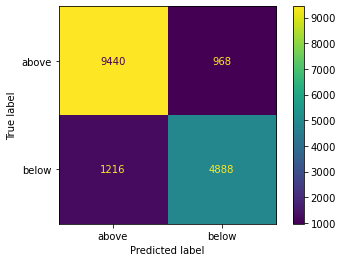

In [102]:

pred_proba = lr_pipe.predict_proba(X_train)

df_conf = pd.DataFrame({'y_train': y_train, 'y_pred': pred_proba[:,1]})
df_conf['Threshold 0.1'] = np.where(df_conf['y_pred'] > 0.1, 'below', 'above')
df_conf['Threshold 0.2'] = np.where(df_conf['y_pred'] > 0.2, 'below', 'above')
df_conf['Threshold 0.3'] = np.where(df_conf['y_pred'] > 0.3, 'below', 'above')
df_conf['Threshold 0.4'] = np.where(df_conf['y_pred'] > 0.4, 'below', 'above')
df_conf['Threshold 0.5'] = np.where(df_conf['y_pred'] > 0.5, 'below', 'above')
df_conf['Threshold 0.6'] = np.where(df_conf['y_pred'] > 0.5, 'below', 'above')
df_conf['Threshold 0.7'] = np.where(df_conf['y_pred'] > 0.7, 'below', 'above')
df_conf['Threshold 0.8'] = np.where(df_conf['y_pred'] > 0.8, 'below', 'above')
#Ausgabe Änderung Treshold
cm = confusion_matrix(y_train, df_conf['Threshold 0.5'])
print(classification_report(y_train, df_conf['Threshold 0.5']))


disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr_pipe.classes_)

disp.plot()
plt.show()

Der ursprüngliche Grenzwert eignet sich am besten für die Anwendung auf die Testdaten, da dieser mit 0.87 den höchsten F1-Score erzielt. 

### Evaluate

In [103]:
y_pred = lr_pipe.fit(X_test, y_test).predict(X_test)

In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       above       0.86      0.90      0.88      2611
       below       0.81      0.75      0.78      1517

    accuracy                           0.84      4128
   macro avg       0.84      0.82      0.83      4128
weighted avg       0.84      0.84      0.84      4128



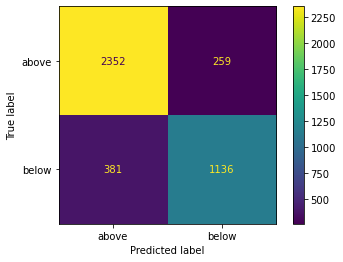

In [105]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lr_pipe.classes_)
disp.plot()
plt.show()

Mit den Testdaten wird ein F1-Score von 0.84 erreicht. Das Modell kann damit als Erfolg gewertet werden. 